In this example, we generate data from the Friedman function but treat one of the variables (the first) as a functional variable.

In [9]:
import pyBayesPPR as pb
import numpy as np
import matplotlib.pyplot as plt

This generates 500 curves of length 50.

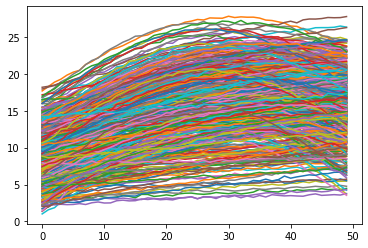

In [10]:
# Friedman function where first variable is the functional variable
def f2(x):
    out = 10. * np.sin(np.pi * tt * x[1]) + 20. * (x[2] - .5) ** 2 + 10 * x[3] + 5. * x[4]
    return out

tt = np.linspace(0, 1, 50) # functional variable grid
n = 500 # sample size
p = 9 # number of predictors other (only 4 are used)
x = np.random.rand(n, p) # training inputs
xx = np.random.rand(1000, p)
e = np.random.normal(size=[n, len(tt)]) * .1 # noise
y = np.apply_along_axis(f2, 1, x) + e # training response
ftest = np.apply_along_axis(f2, 1, xx)
ytest = ftest + np.random.normal(size=[1000, len(tt)]) * .1

plt.plot(y.T)
plt.show()

Now take the principal component decomposition of y to see that most of the variation is captured with 3 principal components.

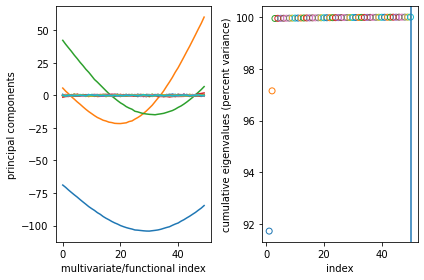

In [11]:
pca = pb.bpprPCAsetup(y)
pca.plot()

Now fit a BPPR model in PCA space.

Starting bpprPCA with 3 components, using 3 cores.
BPPR MCMC Complete. Time: 17.422595 seconds.
BPPR MCMC Complete. Time: 17.702021 seconds.
BPPR MCMC Complete. Time: 19.340840 seconds.


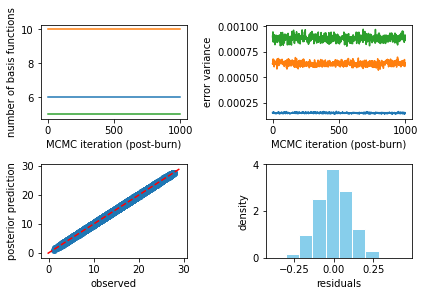

In [12]:
mod2 = pb.bpprPCA(x, y, npc=3, ncores=3)
mod2.plot()

Here are posterior mean predictions of our test data:

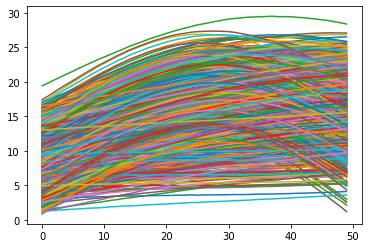

In [13]:
fpred = mod2.predict(xx)
plt.plot(fpred.mean(0).T)
plt.show()

Test data posterior mean vs noiseless observed:

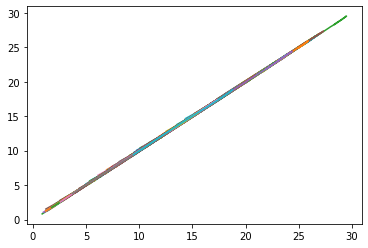

In [14]:
plt.plot(fpred.mean(0).T, ftest.T)
plt.show()

Functional residuals:

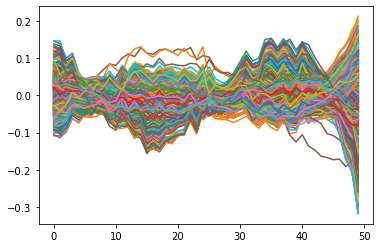

In [15]:
plt.plot(fpred.mean(0).T - ftest.T)
plt.show()

Prediction uncertainty for one of the test samples:

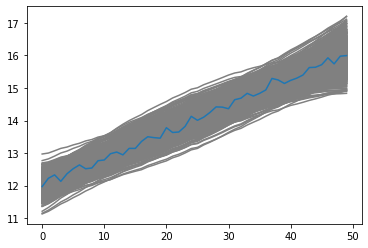

In [16]:
ypred = mod2.predict(xx, nugget=True, trunc_error=False)
plt.plot(ypred[:,70,:].T, color='grey')
plt.plot(ytest[70])
plt.show()